<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
The 1-sample t-test
              
</p>
</div>

Data Science Cohort Live NYC 3Nov 202
<p>Phase 2: Topic 13</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:
from scipy.stats import norm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Provide size $N$ of a given sample is large enough: 
 
- CLT allows us to construct Z-tests on sample mean $\bar{X}$
- against distribution of sample means drawn from a population satisfying the null hypothesis.

#### But when N is small...

Means extracted from finite-sized samples from the null population: 
- not gauranteed to follow the normal distribution

Our statistic:
$$t = \frac{(\bar{X} - \mu_0)}{s/\sqrt{N}} $$


- **CLT cannot be invoked to see how t distributed**
    - $t$ is a composite random variable. 
    - N is small

However, if **null population** normally distributed (or have good reason to believe this):

Then we can say that means of samples drawn from the null population follow **the t-distribution** -- in this small $N$ limit

In [2]:
from scipy.stats import t

In [3]:
%%capture tdistplot

# define t pdf for a few degrees of freedom and normal
x = np.linspace(-4,4,400)
t_distribution5 = t.pdf(x, loc = 0, df = 4) # N = 5
t_distribution10 = t.pdf(x, loc = 0, df = 9) # N = 10 
t_distribution20 = t.pdf(x, loc = 0, df = 19) # N = 20
norm_distribution = norm.pdf(x, loc = 0, scale = 1)

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x,t_distribution5, label = 't-distribution: df = 4' )
ax.plot(x,t_distribution10, label = 't-distribution: df = 9' )
ax.plot(x,t_distribution20, label = 't-distribution: df = 19' )
ax.plot(x,norm_distribution, label = 'normal')
ax.set_xlabel('t',  fontsize = 16)
ax.set_ylabel('PDF', fontsize = 16)
ax.set_title('t-distribution PDF approach to normal', fontsize = 18)
ax.legend()
plt.show()

Recall that t-distribution depends on degrees of freedom (df):
- $df = N - 1 $

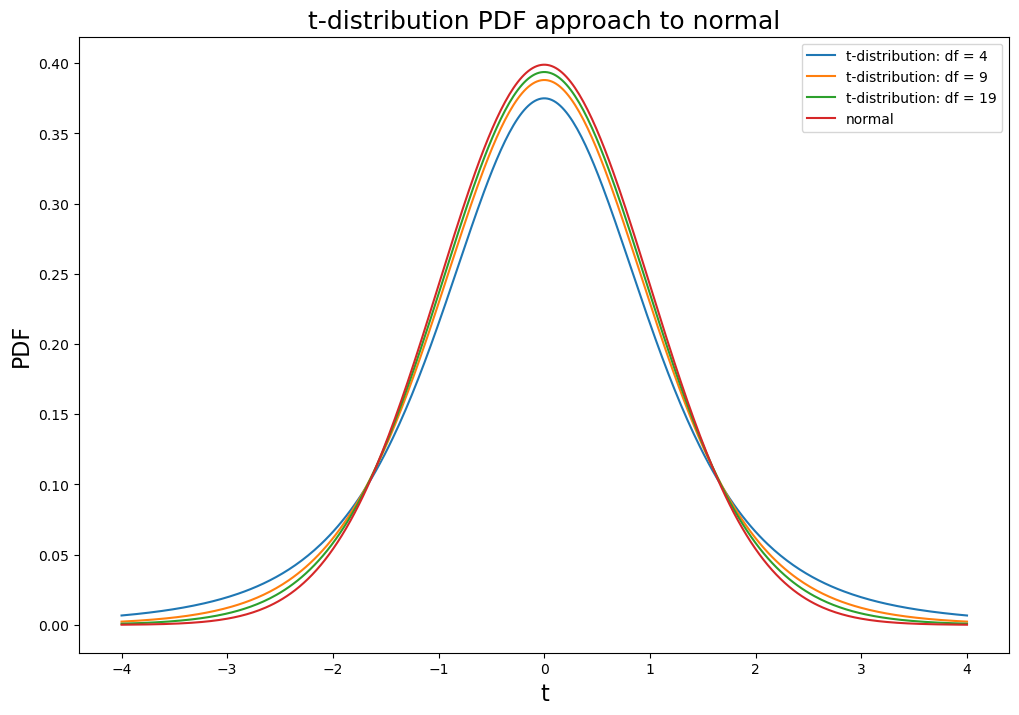

In [4]:
tdistplot()

Looks similar to normal: but tails are fatter.
- But area under tails:
    
    - central to hypothesis testing!
    - critical for acceptance/rejection region
        

#### Hypothesis testing means with t-tests

#### Same story as Z-test, different distribution/critical values.

 **$t$-test**:
 
 - Calculate the **$t$-statistic** using the sample's standard deviation $s$:
 $$\large t = \frac{\bar{X}-\mu_0}{\frac{s}{\sqrt{n}}}$$
 - We calculate the p-value from the **$t$-distribution**

 **Scenario**

 - African savannah elephants: weights distributed normally around a mean of $9000$ lbs. 
 - Wildlife Conservation Society of Gabon: measured weights of $20$ African elephants in Gabon  

 Claim: Gabonese elephants are significantly different from general African population.



$H_0$: _There is no difference between the weight of Gabonese elephants and the general African elephant population_

$H_1$: _There is a difference between the weight of the Gabonese elephants and the general African elephant population_

Let's define our $\alpha = 0.05$

#### What type of tailed test?

Two tailed.

#### Our Gabonese elephant weight sample

Because the sample size is small, we need to use a one sample $t$-test. 

In [5]:
# We're given these values from the sample
gab = np.array([
        8234, 8929, 7922, 8688, 8840, 
        8759, 8127, 8574, 8533, 8944, 
        8631, 8665, 8712, 8984, 8601, 
        8559, 8228, 8474, 8708, 8128
])

In [6]:
print(f'Sample mean: {gab.mean():.1f}')
print(f'Sample std: {gab.std(ddof=1):.1f}')

Sample mean: 8562.0
Sample std: 296.2


Now $\alpha$ = 0.05. Two tailed test.

Calculate t-statistic:
$$ t = \frac{\bar{X} - \mu_0}{\frac{s}{\sqrt{N}}}$$

In [7]:
N = len(gab) # sample size
s_n = gab.std(ddof=1)/np.sqrt(N) 
mu_0 = 9000 # population mean for null (general Savannah population)
t_stat = (gab.mean() - mu_0)/s_n

t_stat

-6.614120615780003

Compute critical t-value $t_{crit}$:
- pretty similar to way we did $Z_{crit}$
- remember this a two-tailed test
- dont forget degrees of freedom

In [8]:
def plot_two_tailed_t(alpha, N):
    x_scaled = np.linspace(-5,5,400)
    Y_scaled = t.pdf(x_scaled, df = N-1)


    t_crit = t.ppf(1- (alpha/2), df = N-1)

    fig, ax = plt.subplots(figsize = (8,5))

    ax.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
    ax.axvline(-t_crit, c = 'b')
    ax.axvline(t_crit, c = 'b')
    ax.fill_between(x_scaled, Y_scaled, where = (x_scaled > t_crit), alpha = 0.5, color='b')
    ax.fill_between(x_scaled, Y_scaled, where = (x_scaled < -t_crit ), alpha = 0.5, color='b')

    ax.annotate(r'$\frac{\alpha}{2}$ = 0.025', xytext = (t_crit + .25,.1), xy = (t_crit + 0.25,.01), fontsize=16, arrowprops=dict(facecolor='b', shrink=0.05), c ='b' )
    ax.annotate(r'$\frac{\alpha}{2}$ = 0.025', xytext = (-t_crit - 2,.1), xy = (-t_crit - .75,.01), fontsize=16, arrowprops=dict(facecolor='b', shrink=0.05), c ='b' )

    ax.annotate(r'$-t_{crit}$', xy = (-t_crit-1.5,.3), fontsize=16, c ='b' )
    ax.annotate(r'$t_{crit}$', xy = (t_crit+0.25,.3), fontsize=16, c ='b' )
    
    ax.set_xlabel('t')
    ax.set_ylabel('PDF')
    ax.set_title('Two-Tailed Test: t-distribution at df = ' + str(N-1))
    

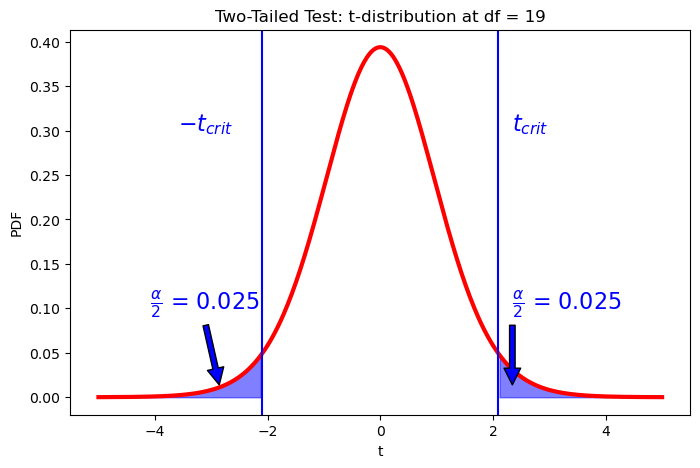

In [9]:
plot_two_tailed_t(alpha = 0.05, N = N)

- Could use t.ppf() or t.isf():
- correspond to $-t_{crit}$ or $t_{crit}$ respectively

Using inverse survival function.

In [10]:
alpha = 0.05
t_crit = t.isf(alpha/2, df = N -1)
t_crit

2.0930240544082634

$$ t_{crit} = \pm 2.09 $$ 

In [11]:
t_stat

-6.614120615780003

Calculate the p-value.

In [12]:
t_abs = np.abs(t_stat)
# need to specify degrees of freedom for cdf. assumes standardized t.
p_value = t.cdf(-t_abs, df = N - 1) + t.sf(t_abs, df = N - 1)
p_value

2.4982149013801283e-06

Reject the null at $\alpha = 0.05$.

#### The easy way with Scipy:
- scipy has a single command for all this

In [13]:
from scipy.stats import ttest_1samp

In [14]:
# this command assumes a two tailed test when calculating the p-value
result = ttest_1samp(gab, mu_0)
t_stat, p_value = result
result

TtestResult(statistic=-6.614120615780001, pvalue=2.498214901380142e-06, df=19)

#### Left-tailed test

In [15]:
def plot_left_tailed_t(alpha, N):
    x_scaled = np.linspace(-5,5,400)
    Y_scaled = t.pdf(x_scaled, df = N-1)

    t_crit = t.ppf(alpha, df = N-1)

    fig, ax = plt.subplots(figsize = (8,5))

    ax.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
    ax.axvline(t_crit, c = 'b')
    ax.fill_between(x_scaled, Y_scaled, where = (x_scaled < t_crit ), alpha = 0.5, color='b')

    ax.annotate(r'$\alpha$ = 0.05', xytext = (t_crit - 2.5,.1), xy = (t_crit - 0.25,.01), fontsize=16, arrowprops=dict(facecolor='b', shrink=0.05), c ='b' )

    ax.annotate(r'$t_{crit}$', xy = (t_crit-1,.3), fontsize=16, c ='b' )
    
    ax.set_xlabel('t')
    ax.set_ylabel('PDF')
    ax.set_title('Two-Tailed Test: t-distribution at df = ' + str(N-1))
    

Suspect that Gabonese elephant weight less than general population.
- $H_0$: $\mu_{Gabo} = \mu_0$
- $H_a$: $\mu_{Gabo} < \mu_0$

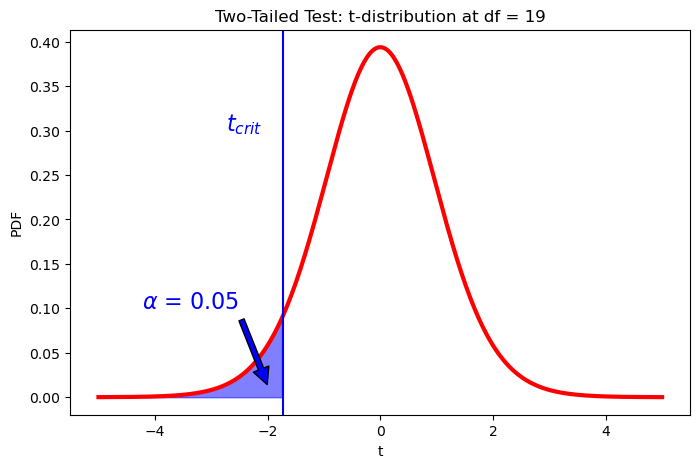

In [16]:
plot_left_tailed_t(alpha = 0.05, N = N)

In [17]:
alpha = 0.05
t_crit = t.ppf(alpha, df = N - 1)
t_crit

-1.7291328115213678

And conduct the one sample left-tailed t-test:

In [18]:
# if this throws an error you need to upgrade your scipy version
result = ttest_1samp(gab, 9000, alternative = 'less')
t_stat, p_value = result
result

TtestResult(statistic=-6.614120615780001, pvalue=1.249107450690071e-06, df=19)

If using older scipy version:
- just use standard two-sided t-test
- one-tailed p-value is half of two-sided p value

In [19]:
result = ttest_1samp(gab, 9000)
t_stat, p_value_twosided = result

pvalue_left_tailed = p_value_twosided/2
print(t_stat, pvalue_left_tailed)

-6.614120615780001 1.249107450690071e-06


In [20]:
result

TtestResult(statistic=-6.614120615780001, pvalue=2.498214901380142e-06, df=19)

Hypothesis testing on physical characteristics and genetic testing:


<center><img src = "Images/elephants.jpg" align = "center" width = 600 /></center>
<center>Forest vs. Savannah Elephant</center>
    
**Inspired conservation effort for the forest elephant as a new species**